In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

import pyfiles.lib as lib
import pyfiles.models as models

In [2]:
num_noise = batch_size = 100
num_hidden = 256

In [3]:
# standardization code
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), ])

# MNIST dataset
train_data = torchvision.datasets.MNIST(root='data/', train=True, transform=transform, download=True)
test_data  = torchvision.datasets.MNIST(root='data/', train=False, transform=transform, download=True)

train_data_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True)
test_data_loader  = torch.utils.data.DataLoader(test_data, batch_size, shuffle=True)

torch.Size([100, 1, 28, 28])
(3, 62, 242)


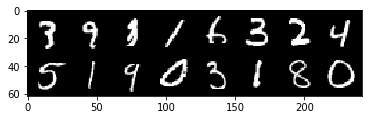

In [4]:
example_mini_batch_img, example_mini_batch_label  = next(iter(train_data_loader))
print(example_mini_batch_img.shape)
lib.imshow_grid(example_mini_batch_img[0:16,:,:])

[Epoch 1/200]Real Image Probability: -0.027, Generated Image Probability: -0.486
[Epoch 2/200]Real Image Probability: -0.053, Generated Image Probability: -0.500
[Epoch 3/200]Real Image Probability: -0.044, Generated Image Probability: -0.495
[Epoch 4/200]Real Image Probability: -0.061, Generated Image Probability: -0.478
[Epoch 5/200]Real Image Probability: -0.066, Generated Image Probability: -0.488
[Epoch 6/200]Real Image Probability: -0.065, Generated Image Probability: -0.498
[Epoch 7/200]Real Image Probability: -0.072, Generated Image Probability: -0.484
[Epoch 8/200]Real Image Probability: -0.064, Generated Image Probability: -0.486
[Epoch 9/200]Real Image Probability: -0.066, Generated Image Probability: -0.489
[Epoch 10/200]Real Image Probability: -0.063, Generated Image Probability: -0.498
(3, 92, 242)


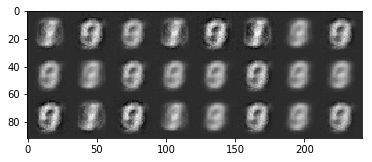

[Epoch 11/200]Real Image Probability: -0.056, Generated Image Probability: -0.498
[Epoch 12/200]Real Image Probability: -0.050, Generated Image Probability: -0.519
[Epoch 13/200]Real Image Probability: -0.059, Generated Image Probability: -0.493
[Epoch 14/200]Real Image Probability: -0.070, Generated Image Probability: -0.484
[Epoch 15/200]Real Image Probability: -0.068, Generated Image Probability: -0.483
[Epoch 16/200]Real Image Probability: -0.058, Generated Image Probability: -0.499
[Epoch 17/200]Real Image Probability: -0.060, Generated Image Probability: -0.501
[Epoch 18/200]Real Image Probability: -0.059, Generated Image Probability: -0.488
[Epoch 19/200]Real Image Probability: -0.065, Generated Image Probability: -0.486
[Epoch 20/200]Real Image Probability: -0.056, Generated Image Probability: -0.493
(3, 92, 242)


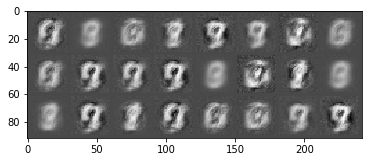

[Epoch 21/200]Real Image Probability: -0.067, Generated Image Probability: -0.496
[Epoch 22/200]Real Image Probability: -0.059, Generated Image Probability: -0.500
[Epoch 23/200]Real Image Probability: -0.040, Generated Image Probability: -0.535
[Epoch 24/200]Real Image Probability: -0.053, Generated Image Probability: -0.496
[Epoch 25/200]Real Image Probability: -0.057, Generated Image Probability: -0.487
[Epoch 26/200]Real Image Probability: -0.063, Generated Image Probability: -0.491
[Epoch 27/200]Real Image Probability: -0.060, Generated Image Probability: -0.488
[Epoch 28/200]Real Image Probability: -0.061, Generated Image Probability: -0.481
[Epoch 29/200]Real Image Probability: -0.051, Generated Image Probability: -0.500
[Epoch 30/200]Real Image Probability: -0.060, Generated Image Probability: -0.489
(3, 92, 242)


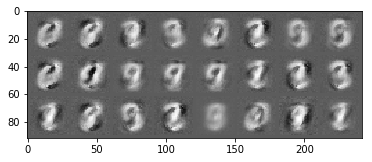

[Epoch 31/200]Real Image Probability: -0.049, Generated Image Probability: -0.491
[Epoch 32/200]Real Image Probability: -0.048, Generated Image Probability: -0.499
[Epoch 33/200]Real Image Probability: -0.046, Generated Image Probability: -0.488
[Epoch 34/200]Real Image Probability: -0.042, Generated Image Probability: -0.490
[Epoch 35/200]Real Image Probability: -0.047, Generated Image Probability: -0.477
[Epoch 36/200]Real Image Probability: -0.050, Generated Image Probability: -0.476
[Epoch 37/200]Real Image Probability: -0.048, Generated Image Probability: -0.476
[Epoch 38/200]Real Image Probability: -0.050, Generated Image Probability: -0.491
[Epoch 39/200]Real Image Probability: -0.050, Generated Image Probability: -0.482
[Epoch 40/200]Real Image Probability: -0.049, Generated Image Probability: -0.487
(3, 92, 242)


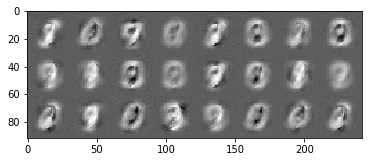

[Epoch 41/200]Real Image Probability: -0.053, Generated Image Probability: -0.483
[Epoch 42/200]Real Image Probability: -0.052, Generated Image Probability: -0.478
[Epoch 43/200]Real Image Probability: -0.045, Generated Image Probability: -0.492
[Epoch 44/200]Real Image Probability: -0.049, Generated Image Probability: -0.490
[Epoch 45/200]Real Image Probability: -0.044, Generated Image Probability: -0.492
[Epoch 46/200]Real Image Probability: -0.053, Generated Image Probability: -0.495
[Epoch 47/200]Real Image Probability: -0.050, Generated Image Probability: -0.503
[Epoch 48/200]Real Image Probability: -0.044, Generated Image Probability: -0.494
[Epoch 49/200]Real Image Probability: -0.046, Generated Image Probability: -0.498
[Epoch 50/200]Real Image Probability: -0.051, Generated Image Probability: -0.493
(3, 92, 242)


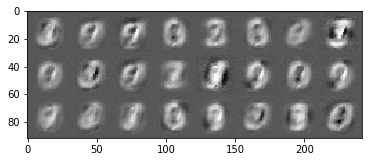

[Epoch 51/200]Real Image Probability: -0.056, Generated Image Probability: -0.499
[Epoch 52/200]Real Image Probability: -0.045, Generated Image Probability: -0.490
[Epoch 53/200]Real Image Probability: -0.045, Generated Image Probability: -0.493
[Epoch 54/200]Real Image Probability: -0.044, Generated Image Probability: -0.487
[Epoch 55/200]Real Image Probability: -0.051, Generated Image Probability: -0.497
[Epoch 56/200]Real Image Probability: -0.039, Generated Image Probability: -0.487
[Epoch 57/200]Real Image Probability: -0.047, Generated Image Probability: -0.489
[Epoch 58/200]Real Image Probability: -0.046, Generated Image Probability: -0.499
[Epoch 59/200]Real Image Probability: -0.040, Generated Image Probability: -0.502
[Epoch 60/200]Real Image Probability: -0.038, Generated Image Probability: -0.501
(3, 92, 242)


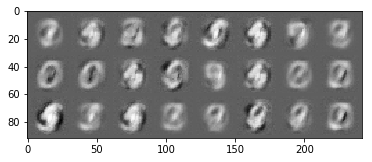

[Epoch 61/200]Real Image Probability: -0.042, Generated Image Probability: -0.497
[Epoch 62/200]Real Image Probability: -0.047, Generated Image Probability: -0.493
[Epoch 63/200]Real Image Probability: -0.039, Generated Image Probability: -0.484
[Epoch 64/200]Real Image Probability: -0.041, Generated Image Probability: -0.487
[Epoch 65/200]Real Image Probability: -0.040, Generated Image Probability: -0.491
[Epoch 66/200]Real Image Probability: -0.039, Generated Image Probability: -0.485
[Epoch 67/200]Real Image Probability: -0.040, Generated Image Probability: -0.485
[Epoch 68/200]Real Image Probability: -0.039, Generated Image Probability: -0.488
[Epoch 69/200]Real Image Probability: -0.039, Generated Image Probability: -0.496
[Epoch 70/200]Real Image Probability: -0.043, Generated Image Probability: -0.482
(3, 92, 242)


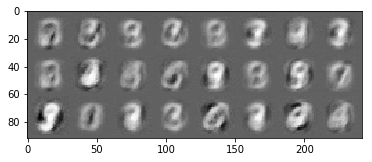

[Epoch 71/200]Real Image Probability: -0.044, Generated Image Probability: -0.488
[Epoch 72/200]Real Image Probability: -0.039, Generated Image Probability: -0.502
[Epoch 73/200]Real Image Probability: -0.045, Generated Image Probability: -0.478
[Epoch 74/200]Real Image Probability: -0.044, Generated Image Probability: -0.482
[Epoch 75/200]Real Image Probability: -0.044, Generated Image Probability: -0.490
[Epoch 76/200]Real Image Probability: -0.041, Generated Image Probability: -0.484
[Epoch 77/200]Real Image Probability: -0.044, Generated Image Probability: -0.476
[Epoch 78/200]Real Image Probability: -0.039, Generated Image Probability: -0.491
[Epoch 79/200]Real Image Probability: -0.037, Generated Image Probability: -0.485
[Epoch 80/200]Real Image Probability: -0.038, Generated Image Probability: -0.495
(3, 92, 242)


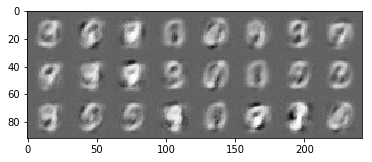

[Epoch 81/200]Real Image Probability: -0.040, Generated Image Probability: -0.492
[Epoch 82/200]Real Image Probability: -0.042, Generated Image Probability: -0.492
[Epoch 83/200]Real Image Probability: -0.044, Generated Image Probability: -0.487
[Epoch 84/200]Real Image Probability: -0.039, Generated Image Probability: -0.487
[Epoch 85/200]Real Image Probability: -0.035, Generated Image Probability: -0.481
[Epoch 86/200]Real Image Probability: -0.039, Generated Image Probability: -0.490
[Epoch 87/200]Real Image Probability: -0.041, Generated Image Probability: -0.496
[Epoch 88/200]Real Image Probability: -0.042, Generated Image Probability: -0.483
[Epoch 89/200]Real Image Probability: -0.044, Generated Image Probability: -0.494
[Epoch 90/200]Real Image Probability: -0.038, Generated Image Probability: -0.502
(3, 92, 242)


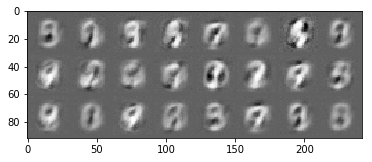

[Epoch 91/200]Real Image Probability: -0.044, Generated Image Probability: -0.482
[Epoch 92/200]Real Image Probability: -0.041, Generated Image Probability: -0.485
[Epoch 93/200]Real Image Probability: -0.039, Generated Image Probability: -0.487
[Epoch 94/200]Real Image Probability: -0.042, Generated Image Probability: -0.489
[Epoch 95/200]Real Image Probability: -0.043, Generated Image Probability: -0.487
[Epoch 96/200]Real Image Probability: -0.042, Generated Image Probability: -0.493
[Epoch 97/200]Real Image Probability: -0.045, Generated Image Probability: -0.485
[Epoch 98/200]Real Image Probability: -0.036, Generated Image Probability: -0.498
[Epoch 99/200]Real Image Probability: -0.041, Generated Image Probability: -0.496
[Epoch 100/200]Real Image Probability: -0.040, Generated Image Probability: -0.489
(3, 92, 242)


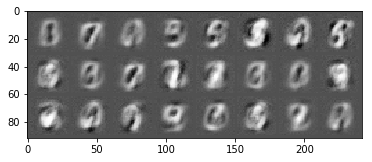

[Epoch 101/200]Real Image Probability: -0.039, Generated Image Probability: -0.487
[Epoch 102/200]Real Image Probability: -0.041, Generated Image Probability: -0.486
[Epoch 103/200]Real Image Probability: -0.035, Generated Image Probability: -0.491
[Epoch 104/200]Real Image Probability: -0.034, Generated Image Probability: -0.484
[Epoch 105/200]Real Image Probability: -0.038, Generated Image Probability: -0.492
[Epoch 106/200]Real Image Probability: -0.039, Generated Image Probability: -0.492
[Epoch 107/200]Real Image Probability: -0.038, Generated Image Probability: -0.494
[Epoch 108/200]Real Image Probability: -0.038, Generated Image Probability: -0.485
[Epoch 109/200]Real Image Probability: -0.039, Generated Image Probability: -0.491
[Epoch 110/200]Real Image Probability: -0.039, Generated Image Probability: -0.499
(3, 92, 242)


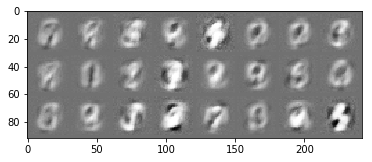

[Epoch 111/200]Real Image Probability: -0.039, Generated Image Probability: -0.494
[Epoch 112/200]Real Image Probability: -0.036, Generated Image Probability: -0.491
[Epoch 113/200]Real Image Probability: -0.037, Generated Image Probability: -0.479
[Epoch 114/200]Real Image Probability: -0.037, Generated Image Probability: -0.489
[Epoch 115/200]Real Image Probability: -0.036, Generated Image Probability: -0.492
[Epoch 116/200]Real Image Probability: -0.037, Generated Image Probability: -0.490
[Epoch 117/200]Real Image Probability: -0.038, Generated Image Probability: -0.489
[Epoch 118/200]Real Image Probability: -0.033, Generated Image Probability: -0.497
[Epoch 119/200]Real Image Probability: -0.038, Generated Image Probability: -0.492
[Epoch 120/200]Real Image Probability: -0.035, Generated Image Probability: -0.487
(3, 92, 242)


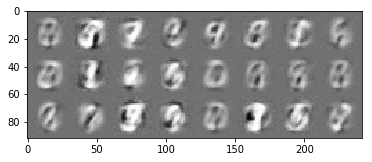

[Epoch 121/200]Real Image Probability: -0.037, Generated Image Probability: -0.495
[Epoch 122/200]Real Image Probability: -0.032, Generated Image Probability: -0.496
[Epoch 123/200]Real Image Probability: -0.031, Generated Image Probability: -0.491
[Epoch 124/200]Real Image Probability: -0.036, Generated Image Probability: -0.495
[Epoch 125/200]Real Image Probability: -0.034, Generated Image Probability: -0.488
[Epoch 126/200]Real Image Probability: -0.035, Generated Image Probability: -0.491
[Epoch 127/200]Real Image Probability: -0.032, Generated Image Probability: -0.495
[Epoch 128/200]Real Image Probability: -0.029, Generated Image Probability: -0.494
[Epoch 129/200]Real Image Probability: -0.033, Generated Image Probability: -0.497
[Epoch 130/200]Real Image Probability: -0.033, Generated Image Probability: -0.487
(3, 92, 242)


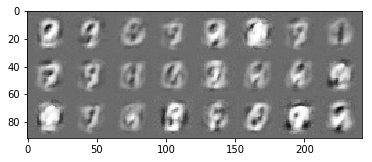

[Epoch 131/200]Real Image Probability: -0.035, Generated Image Probability: -0.488
[Epoch 132/200]Real Image Probability: -0.035, Generated Image Probability: -0.482
[Epoch 133/200]Real Image Probability: -0.035, Generated Image Probability: -0.488
[Epoch 134/200]Real Image Probability: -0.034, Generated Image Probability: -0.495
[Epoch 135/200]Real Image Probability: -0.035, Generated Image Probability: -0.495
[Epoch 136/200]Real Image Probability: -0.030, Generated Image Probability: -0.493
[Epoch 137/200]Real Image Probability: -0.033, Generated Image Probability: -0.489
[Epoch 138/200]Real Image Probability: -0.034, Generated Image Probability: -0.486
[Epoch 139/200]Real Image Probability: -0.031, Generated Image Probability: -0.487
[Epoch 140/200]Real Image Probability: -0.033, Generated Image Probability: -0.488
(3, 92, 242)


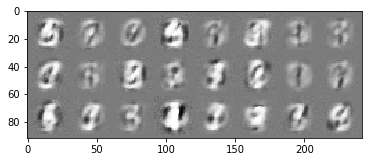

[Epoch 141/200]Real Image Probability: -0.035, Generated Image Probability: -0.488
[Epoch 142/200]Real Image Probability: -0.032, Generated Image Probability: -0.493
[Epoch 143/200]Real Image Probability: -0.033, Generated Image Probability: -0.479
[Epoch 144/200]Real Image Probability: -0.031, Generated Image Probability: -0.487
[Epoch 145/200]Real Image Probability: -0.033, Generated Image Probability: -0.483
[Epoch 146/200]Real Image Probability: -0.032, Generated Image Probability: -0.483
[Epoch 147/200]Real Image Probability: -0.033, Generated Image Probability: -0.498
[Epoch 148/200]Real Image Probability: -0.031, Generated Image Probability: -0.489
[Epoch 149/200]Real Image Probability: -0.029, Generated Image Probability: -0.490
[Epoch 150/200]Real Image Probability: -0.032, Generated Image Probability: -0.489
(3, 92, 242)


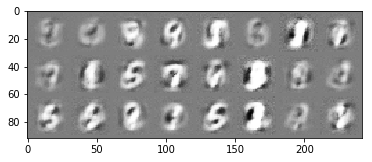

[Epoch 151/200]Real Image Probability: -0.031, Generated Image Probability: -0.491
[Epoch 152/200]Real Image Probability: -0.033, Generated Image Probability: -0.492
[Epoch 153/200]Real Image Probability: -0.030, Generated Image Probability: -0.491
[Epoch 154/200]Real Image Probability: -0.030, Generated Image Probability: -0.489
[Epoch 155/200]Real Image Probability: -0.029, Generated Image Probability: -0.491
[Epoch 156/200]Real Image Probability: -0.031, Generated Image Probability: -0.486
[Epoch 157/200]Real Image Probability: -0.029, Generated Image Probability: -0.492
[Epoch 158/200]Real Image Probability: -0.031, Generated Image Probability: -0.484
[Epoch 159/200]Real Image Probability: -0.029, Generated Image Probability: -0.484
[Epoch 160/200]Real Image Probability: -0.030, Generated Image Probability: -0.497
(3, 92, 242)


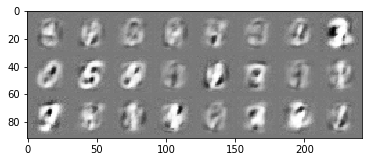

[Epoch 161/200]Real Image Probability: -0.028, Generated Image Probability: -0.485
[Epoch 162/200]Real Image Probability: -0.026, Generated Image Probability: -0.490
[Epoch 163/200]Real Image Probability: -0.029, Generated Image Probability: -0.487


KeyboardInterrupt: 

In [7]:
epochs = 200
gen = models.Generator_FC(input_node_size=num_noise)
disc = models.Discriminator_FC()

if torch.cuda.is_available():
    gen = gen.cuda()
    disc = disc.cuda()

lib.init_params(gen)
lib.init_params(disc)

gen_optim = torch.optim.RMSprop(gen.parameters(), lr=0.00005)
disc_optim = torch.optim.RMSprop(disc.parameters(), lr=0.00005)

for epoch in range(epochs):
    disc.train()
    gen.train()
    
    for i, data in enumerate(train_data_loader):
        x, _ = data
        num_data = x.shape[0]
        noise = lib.sample_noise(num_data, num_noise)
        
        if torch.cuda.is_available():
            x = x.cuda()
            noise = noise.cuda()
        
        gen_img = gen(noise).view(num_data, -1)
                    
        ### Discriminator
        disc_optim.zero_grad()
        p_real = disc(x.view(-1, 28*28))
        p_fake = disc(gen_img.detach())
        
        loss_d = torch.mean(p_fake) - torch.mean(p_real)
        loss_d.backward()
        disc_optim.step()
        
        for params in disc.parameters():
            params.data.clamp_(-0.01, 0.01)
            
        if i % 5 == 0:
            ### Generator
            gen_optim.zero_grad()
            p_fake = disc(gen_img.view(-1, 28*28))

            loss_g = -torch.mean(p_fake)
            loss_g.backward()
            gen_optim.step()
    
    print("[Epoch %d/%d] D loss: %.3f, G loss: %.3f" % (epoch+1, epochs, loss_d.item(), loss_g.item()))
    
    if epoch % 10 == 9:
        disc.eval()
        gen.eval()
        
        p_real = p_gen = 0.0
        noise = lib.sample_noise(24, num_noise)
        if torch.cuda.is_available():
            noise = noise.cuda()
       
        fake_img = gen(noise).view((-1, 1, 28, 28))
        lib.imshow_grid(fake_img)
        #lib.imsave(fake_img, epoch)